In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras




In [2]:
print(tf.__version__)


2.12.0


# Obtain

In [141]:
#https://medium.com/mlearning-ai/how-to-effortlessly-explore-your-idx-dataset-97753246031f
#!pip install idx2numpy
import idx2numpy

# Define the file path of the labels file
labels_file= 'train-labels-idx1-ubyte'
images_file='train-images-idx3-ubyte'
l2_file='t10k-labels-idx1-ubyte'
i2_file='t10k-images-idx3-ubyte'
# Load the labels & image files from the file
train_labels= idx2numpy.convert_from_file(labels_file)
train_images= idx2numpy.convert_from_file(images_file)
test_labels= idx2numpy.convert_from_file(l2_file)
test_images= idx2numpy.convert_from_file(i2_file)

# Explore

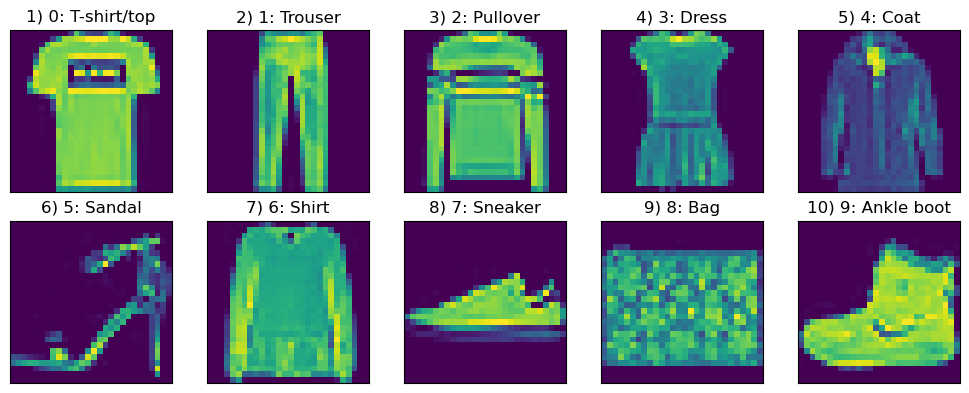

In [8]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
         'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_numbers = [0,1,2,3,4,5,6,7,8,9]
# Each of the item
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                       figsize=(10,4) )
ax = ax.flatten()
for i in range(10):
    img = train_images[train_labels == i][0].reshape(28,28)
    ax[i].imshow(img, interpolation='nearest')
    ax[i].set_title('{}) {}: {}'.format(i+1, label_numbers[i], label[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

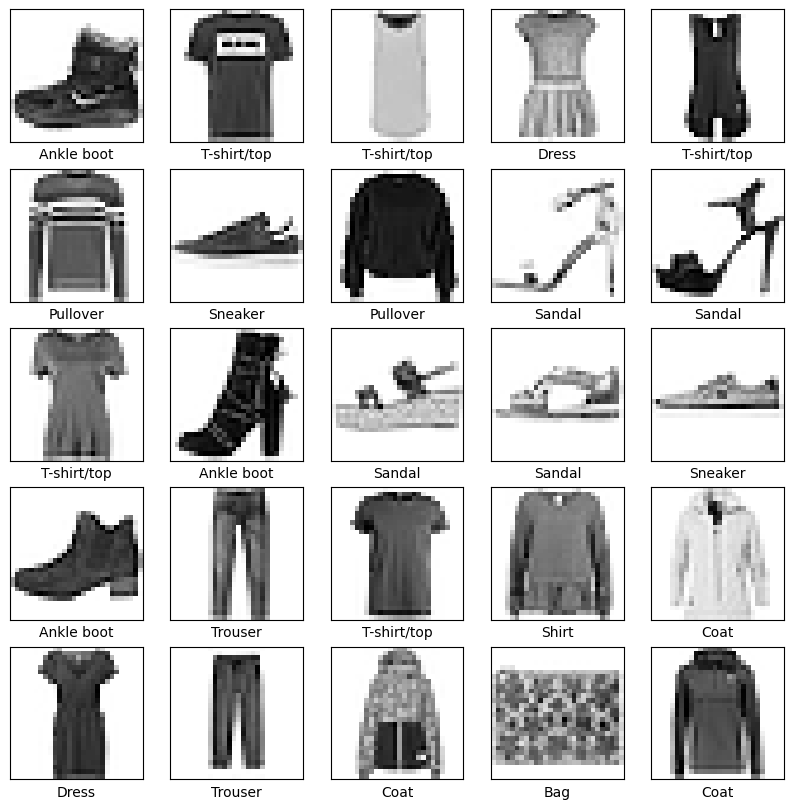

In [6]:
#https://www.tensorflow.org/tutorials/images/cnn
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Greys')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(label[train_labels[i]])
plt.show()

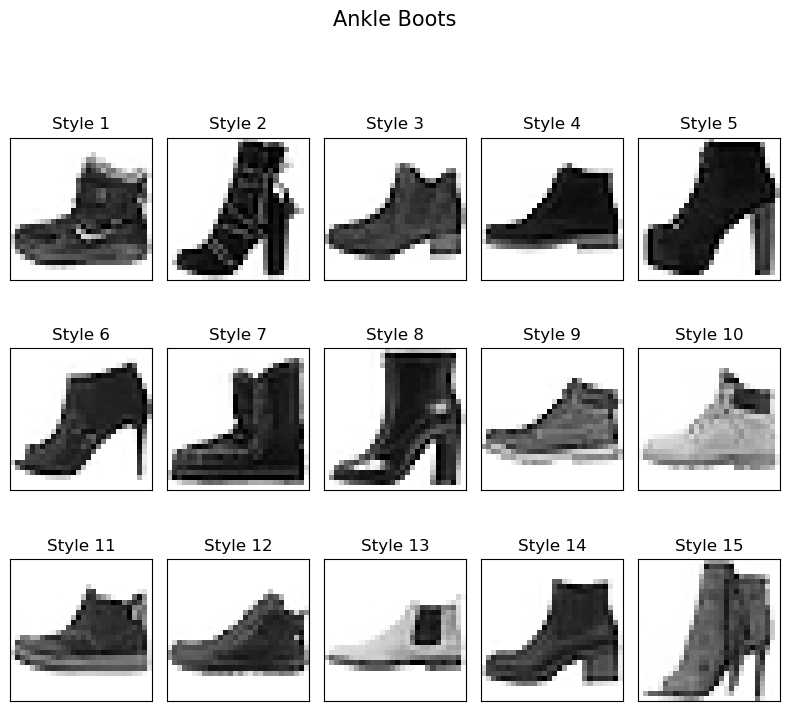

In [10]:
# Variation of an item (Ankle Boots)
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,
                       figsize=(8,8))
ax = ax.flatten()
for i in range(15):
    img = train_images[train_labels == 9][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('Style {}'.format(i+1))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.suptitle('Ankle Boots', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('cloth_mnist_coat.png', dpi=300)
plt.show()

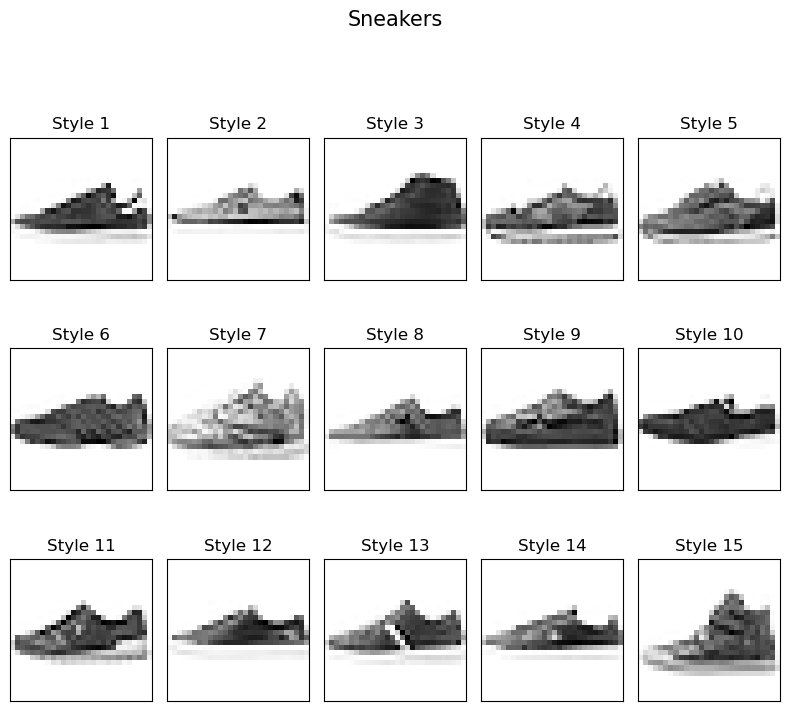

In [12]:
# Variation of an item (Sneakers)
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,
                       figsize=(8,8))
ax = ax.flatten()
for i in range(15):
    img = train_images[train_labels == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('Style {}'.format(i+1))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.suptitle('Sneakers', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('cloth_mnist_coat.png', dpi=300)
plt.show()

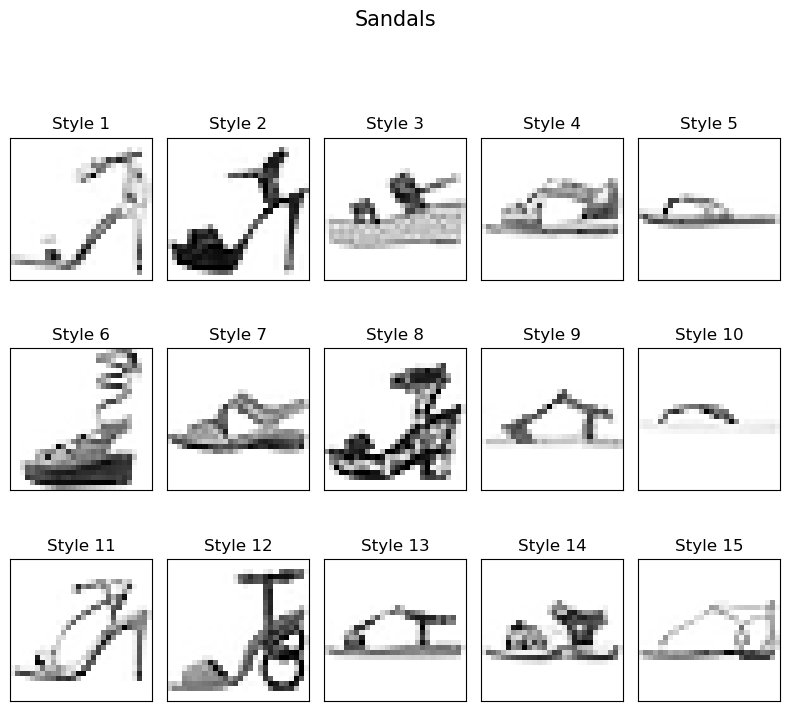

In [213]:
# Variation of an item (Sandals)
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,
                       figsize=(8,8))
ax = ax.flatten()
for i in range(15):
    img = train_images[train_labels == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('Style {}'.format(i+1))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.suptitle('Sandals', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('cloth_mnist_coat.png', dpi=300)
plt.show()

# Scrub

In [142]:
# Reshape the training set and the test set to be into the vector format
# Since each image's dimension is 28x28, we reshape the full dataset 
#to [-1 (all elements), height * width]
x_images = train_images.reshape(-1, 28*28)
y_images = test_images.reshape(-1, 28*28)

# Print the shape of the training data
print("Training data shape:", x_images.shape)

# Print the shape of the training labels
print("Training labels shape:", train_labels.shape)

# Print the shape of the test data
print("Test data shape:", x_images.shape)

# Print the shape of the test labels
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (60000, 784)
Test labels shape: (10000,)


# Model

### Gaussian Naive Bayes

In [42]:
#https://scikit-learn.org/stable/modules/naive_bayes.html#
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
gnb = GaussianNB()

In [43]:
start = time.time()

gnbm = gnb.fit(x_images, train_labels)

end = time.time()
final_time = end-start
print('Training time:{}'.format(final_time))

Training time:0.4681084156036377


In [44]:
start = time.time()

gnbm_pred = gnb.predict(x_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:3.753523111343384


In [45]:
print("Number of mislabeled points out of a total %d points: %d" % (x_images.shape[0], (train_labels != gnbm_pred).sum()))

Number of mislabeled points out of a total 60000 points: 24733


In [46]:
# Classification Report
print(classification_report(train_labels, gnbm_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8333    0.6123    0.7059      6000
           1     0.6357    0.9488    0.7613      6000
           2     0.5986    0.3247    0.4210      6000
           3     0.4463    0.5655    0.4989      6000
           4     0.3751    0.7542    0.5010      6000
           5     0.9178    0.2585    0.4034      6000
           6     0.3287    0.0435    0.0768      6000
           7     0.5000    0.9773    0.6616      6000
           8     0.8512    0.7198    0.7800      6000
           9     0.9119    0.6732    0.7746      6000

    accuracy                         0.5878     60000
   macro avg     0.6399    0.5878    0.5584     60000
weighted avg     0.6399    0.5878    0.5584     60000



In [47]:
ga=accuracy_score(train_labels, gnbm_pred)
print(ga)

0.5877833333333333


In [48]:
start = time.time()

gnbm_pred = gnb.predict(y_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.5954279899597168


In [49]:
print("Number of mislabeled points out of a total %d points: %d" % (y_images.shape[0], (test_labels != gnbm_pred).sum()))

Number of mislabeled points out of a total 10000 points: 4144


In [51]:
# Classification Report
print(classification_report(test_labels, gnbm_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8139    0.5860    0.6814      1000
           1     0.6370    0.9390    0.7591      1000
           2     0.5891    0.3240    0.4181      1000
           3     0.4445    0.5450    0.4897      1000
           4     0.3767    0.7790    0.5078      1000
           5     0.9267    0.2780    0.4277      1000
           6     0.3200    0.0400    0.0711      1000
           7     0.5051    0.9880    0.6685      1000
           8     0.8333    0.7100    0.7667      1000
           9     0.9150    0.6670    0.7715      1000

    accuracy                         0.5856     10000
   macro avg     0.6361    0.5856    0.5562     10000
weighted avg     0.6361    0.5856    0.5562     10000



In [50]:
ga=accuracy_score(test_labels, gnbm_pred)
print(ga)

0.5856


### Categorical Naive Bayes

In [52]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB
start = time.time()
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(force_alpha=True)
clf.fit(x_images, train_labels)
CategoricalNB(force_alpha=True)
print(clf.predict(x_images))
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))

[9 0 3 ... 3 0 5]


Testing time:6.224043607711792


In [53]:
clf.score(x_images, train_labels)

0.7885833333333333

In [54]:
start = time.time()
cnb_pred = clf.predict(x_images)
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:2.5036206245422363


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(train_labels, cnb_pred)

0.7885833333333333

In [56]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(train_labels, cnb_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8116    0.8063    0.8090      6000
           1     0.9846    0.9393    0.9614      6000
           2     0.7798    0.5590    0.6512      6000
           3     0.7282    0.8912    0.8015      6000
           4     0.5658    0.6902    0.6218      6000
           5     0.9190    0.8185    0.8658      6000
           6     0.5288    0.4802    0.5033      6000
           7     0.7832    0.9237    0.8477      6000
           8     0.9470    0.8790    0.9117      6000
           9     0.9114    0.8985    0.9049      6000

    accuracy                         0.7886     60000
   macro avg     0.7959    0.7886    0.7878     60000
weighted avg     0.7959    0.7886    0.7878     60000



In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB
start = time.time()
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(force_alpha=True)
clf.fit(y_images, test_labels)
CategoricalNB(force_alpha=True)
print(clf.predict(y_images))
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))

[9 2 1 ... 3 1 5]


Testing time:0.9413330554962158


In [64]:
clf.score(y_images, test_labels)

0.8998

In [65]:
start = time.time()
cnb_pred = clf.predict(y_images)
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.21854543685913086


In [66]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, cnb_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9239    0.8990    0.9113      1000
           1     0.9782    0.9850    0.9816      1000
           2     0.9682    0.8220    0.8891      1000
           3     0.7899    0.9810    0.8751      1000
           4     0.7141    0.8890    0.7920      1000
           5     0.9661    0.9410    0.9534      1000
           6     0.9486    0.6460    0.7686      1000
           7     0.8761    0.9760    0.9234      1000
           8     0.9774    0.9080    0.9414      1000
           9     0.9645    0.9510    0.9577      1000

    accuracy                         0.8998     10000
   macro avg     0.9107    0.8998    0.8994     10000
weighted avg     0.9107    0.8998    0.8994     10000



In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, cnb_pred)

0.8998

## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier 
start = time.time()

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(x_images, train_labels)
print('Score: ', forest.score(x_images, train_labels))
predictions = forest.predict(x_images)
end = time.time()
final_time = end-start
print('Testing time:{}'.format(final_time))

Score:  0.9999833333333333
Testing time:97.15000033378601


In [85]:
start = time.time()
rf_pred = forest.predict(x_images)
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:2.5830118656158447


In [86]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(train_labels, rf_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      6000
           1     1.0000    1.0000    1.0000      6000
           2     1.0000    1.0000    1.0000      6000
           3     1.0000    1.0000    1.0000      6000
           4     1.0000    1.0000    1.0000      6000
           5     1.0000    0.9998    0.9999      6000
           6     1.0000    1.0000    1.0000      6000
           7     1.0000    1.0000    1.0000      6000
           8     1.0000    1.0000    1.0000      6000
           9     0.9998    1.0000    0.9999      6000

    accuracy                         1.0000     60000
   macro avg     1.0000    1.0000    1.0000     60000
weighted avg     1.0000    1.0000    1.0000     60000



In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(train_labels, rf_pred)

0.9999833333333333

In [82]:
start = time.time()
rf_pred = forest.predict(y_images)
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:0.4879770278930664


In [83]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, rf_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8155    0.8620    0.8381      1000
           1     0.9938    0.9590    0.9761      1000
           2     0.7672    0.8010    0.7838      1000
           3     0.8733    0.9100    0.8913      1000
           4     0.7684    0.8160    0.7915      1000
           5     0.9785    0.9560    0.9671      1000
           6     0.7263    0.5890    0.6505      1000
           7     0.9246    0.9560    0.9400      1000
           8     0.9567    0.9720    0.9643      1000
           9     0.9536    0.9460    0.9498      1000

    accuracy                         0.8767     10000
   macro avg     0.8758    0.8767    0.8752     10000
weighted avg     0.8758    0.8767    0.8752     10000



In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, rf_pred)

0.8767

## K-Nearest Neighbors

In [68]:
# MODEL BUILD - K-Nearest Neighbors - Just fit/score entire sample
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knn=neigh.fit(x_images, train_labels)
knnscore=neigh.score(x_images, train_labels)
end = time.time()
final_time = end-start
print('Testing time:{}'.format(final_time))

Testing time:100.55518865585327


In [69]:
start = time.time()

knn_pred = knn.predict(x_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:97.87772393226624


In [70]:
knnscore

0.9199333333333334

In [72]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(train_labels, knn_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8460    0.9375    0.8894      6000
           1     0.9941    0.9867    0.9904      6000
           2     0.8173    0.8982    0.8558      6000
           3     0.9475    0.9257    0.9364      6000
           4     0.8914    0.8547    0.8726      6000
           5     0.9966    0.9167    0.9549      6000
           6     0.8521    0.7555    0.8009      6000
           7     0.9388    0.9738    0.9560      6000
           8     0.9906    0.9688    0.9796      6000
           9     0.9417    0.9818    0.9613      6000

    accuracy                         0.9199     60000
   macro avg     0.9216    0.9199    0.9197     60000
weighted avg     0.9216    0.9199    0.9197     60000



In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(train_labels, knn_pred)

0.9199333333333334

In [74]:
start = time.time()

knn_pred = knn.predict(y_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))



Testing time:14.202110052108765


In [75]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(test_labels, knn_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7569    0.8530    0.8021      1000
           1     0.9828    0.9710    0.9769      1000
           2     0.7154    0.8120    0.7607      1000
           3     0.9115    0.8550    0.8824      1000
           4     0.8041    0.7430    0.7723      1000
           5     0.9929    0.8350    0.9071      1000
           6     0.6517    0.5950    0.6221      1000
           7     0.8872    0.9520    0.9185      1000
           8     0.9794    0.9520    0.9655      1000
           9     0.8935    0.9730    0.9315      1000

    accuracy                         0.8541     10000
   macro avg     0.8575    0.8541    0.8539     10000
weighted avg     0.8575    0.8541    0.8539     10000



In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, knn_pred)

0.8541

## Scrub

In [214]:
# Reshape the training set and the test set to be into the vector format
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

# Print the shape of the training data
print("Training data shape:", train_images.shape)

# Print the shape of the training labels
print("Training labels shape:", train_labels.shape)

# Print the shape of the test data
print("Test data shape:", test_images.shape)

# Print the shape of the test labels
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


## Linear Support Vector Machine

In [92]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [93]:
start = time.time()

svc=LinearSVC()
svc.fit(train_images, train_labels)
svc_pred=svc.predict(train_images)
svc_acc=accuracy_score(train_labels,svc_pred)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))

Test accuracy: 79.84%


Testing time:267.58970737457275


C:\Users\ksmen\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [96]:
# Classification Report
print(classification_report(train_labels, svc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7590    0.8118    0.7845      6000
           1     0.9927    0.9457    0.9686      6000
           2     0.8541    0.5348    0.6578      6000
           3     0.9333    0.7445    0.8283      6000
           4     0.6124    0.8555    0.7138      6000
           5     0.7427    0.9783    0.8444      6000
           6     0.5201    0.6467    0.5765      6000
           7     0.9774    0.7073    0.8207      6000
           8     0.9749    0.8478    0.9069      6000
           9     0.9093    0.9118    0.9105      6000

    accuracy                         0.7984     60000
   macro avg     0.8276    0.7984    0.8012     60000
weighted avg     0.8276    0.7984    0.8012     60000



In [95]:
# Compare predictions with actual labels
for pred_label, true_label in zip(svc_pred, train_labels):
    print("Predicted: {}, Actual: {}".format(pred_label, true_label))

print("Train accuracy: {:.2f}%".format(svc_pred * 100))

Predicted: 9, Actual: 9
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 6, Actual: 3
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 5, Actual: 7
Predicted: 4, Actual: 2
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 0, Actual: 0
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 6, Actual: 6
Predicted: 4, Actual: 4
Predicted: 3, Actual: 3
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 8, Actual: 8
Predicted: 2, Actual: 4
Predicted: 4, Actual: 3
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 3, Actual: 3
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 0, Actual: 0
Predicted: 8, Actual: 8
Predicted: 8, Actual: 5
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 7, Ac

NameError: name 'svc_acc_train' is not defined

In [144]:
start = time.time()
svc_pred=svc.predict(test_images)
svc_acc=accuracy_score(test_labels,svc_pred)
print("Test accuracy: {:.2f}%".format(svc_acc*100))
end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))

Test accuracy: 77.10%


Testing time:0.03667616844177246


In [117]:
print(classification_report(test_labels, svc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7373    0.7830    0.7595      1000
           1     0.9678    0.9320    0.9496      1000
           2     0.7943    0.4980    0.6122      1000
           3     0.9073    0.7050    0.7935      1000
           4     0.5838    0.8430    0.6899      1000
           5     0.7271    0.9430    0.8211      1000
           6     0.4698    0.5760    0.5175      1000
           7     0.9524    0.6800    0.7935      1000
           8     0.9664    0.8330    0.8947      1000
           9     0.8920    0.9170    0.9043      1000

    accuracy                         0.7710     10000
   macro avg     0.7998    0.7710    0.7736     10000
weighted avg     0.7998    0.7710    0.7736     10000



In [215]:
# Compare predictions with actual labels
for pred_label, true_label in zip(svc_pred, test_labels):
    print("Predicted: {}, Actual: {}".format(pred_label, true_label))

print("Train accuracy: {:.2f}%".format(svc_pred * 100))

Predicted: 9, Actual: 9
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 6, Actual: 6
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 5, Actual: 7
Predicted: 3, Actual: 3
Predicted: 4, Actual: 4
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 4, Actual: 4
Predicted: 8, Actual: 8
Predicted: 0, Actual: 0
Predicted: 6, Actual: 2
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 5, Actual: 9
Predicted: 1, Actual: 1
Predicted: 2, Actual: 4
Predicted: 6, Actual: 6
Predicted: 0, Actual: 0
Predicted: 9, Actual: 9
Predicted: 6, Actual: 3
Predicted: 5, Actual: 8
Predicted: 8, Actual: 8
Predicted: 3, Actual: 3
Predicted: 3, Actual: 3
Predicted: 8, Actual: 8
Predicted: 6, Actual: 0
Predicted: 7, Actual: 7
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 6, Actual: 6
Predicted: 1, Ac

##### Keras is a programming tool that helps people create and work with neural networks, and can be used with another tool called TensorFlow. Keras makes it easier to build and train neural networks.


### Neural Networks with Tensorflow

In [137]:
#https://medium.com/mlearning-ai/how-to-effortlessly-explore-your-idx-dataset-97753246031f
#!pip install idx2numpy
import idx2numpy

# Define the file path of the labels file
labels_file= 'train-labels-idx1-ubyte'
images_file='train-images-idx3-ubyte'
l2_file='t10k-labels-idx1-ubyte'
i2_file='t10k-images-idx3-ubyte'
# Load the labels & image files from the file
train_labels= idx2numpy.convert_from_file(labels_file)
train_images= idx2numpy.convert_from_file(images_file)
test_labels= idx2numpy.convert_from_file(l2_file)
test_images= idx2numpy.convert_from_file(i2_file)


In [100]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

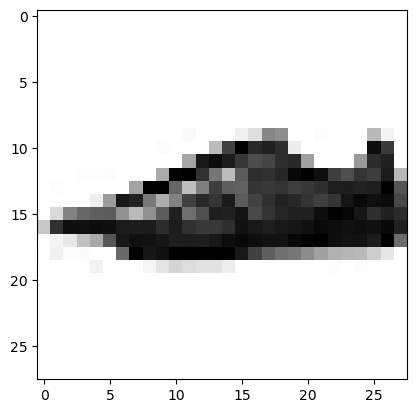

In [101]:
plt.imshow(x_train[0], cmap=plt.cm.binary)


In [102]:
#normalize
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

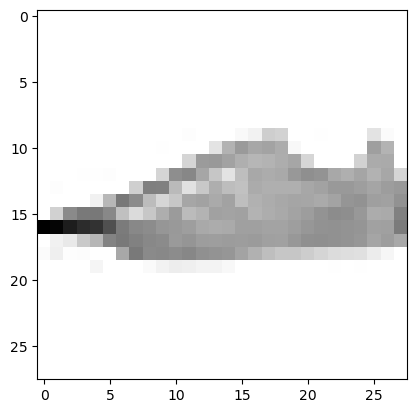

In [104]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [106]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)


In [109]:
start=time.time()
e3=tf.keras.models.Sequential()
e3.add(tf.keras.layers.Flatten())
e3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
e3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
e3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
e3.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#Probablity distribution
e3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
end=time.time()
ft=end-start
print('e3 time:{}'.format(ft))

e3 time:0.039044857025146484


In [110]:
start=time.time()
e3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
m1=e3.fit(x_train,y_train, epochs=10, validation_split=.2)
end=time.time()
ft=end-start
print('e3 time:{}'.format(ft))

Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5461 - accuracy: 0.7989 - val_loss: 0.4147 - val_accuracy: 0.8433
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3899 - accuracy: 0.8546 - val_loss: 0.4085 - val_accuracy: 0.8482
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3466 - accuracy: 0.8705 - val_loss: 0.3390 - val_accuracy: 0.8723
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3183 - accuracy: 0.8816 - val_loss: 0.3334 - val_accuracy: 0.8780
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2995 - accuracy: 0.8880 - val_loss: 0.3523 - val_accuracy: 0.8720
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2831 - accuracy: 0.8938 - val_loss: 0.3584 - val_accuracy: 0.8698
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2731 - accuracy: 0.8975 - val_loss: 0.3616 - val_accuracy:

In [111]:
e3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 128)                 16512     
                                                                 
 dense_2 (Dense)             (32, 128)                 16512     
                                                                 
 dense_3 (Dense)             (32, 128)                 16512     
                                                                 
 dense_4 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trai

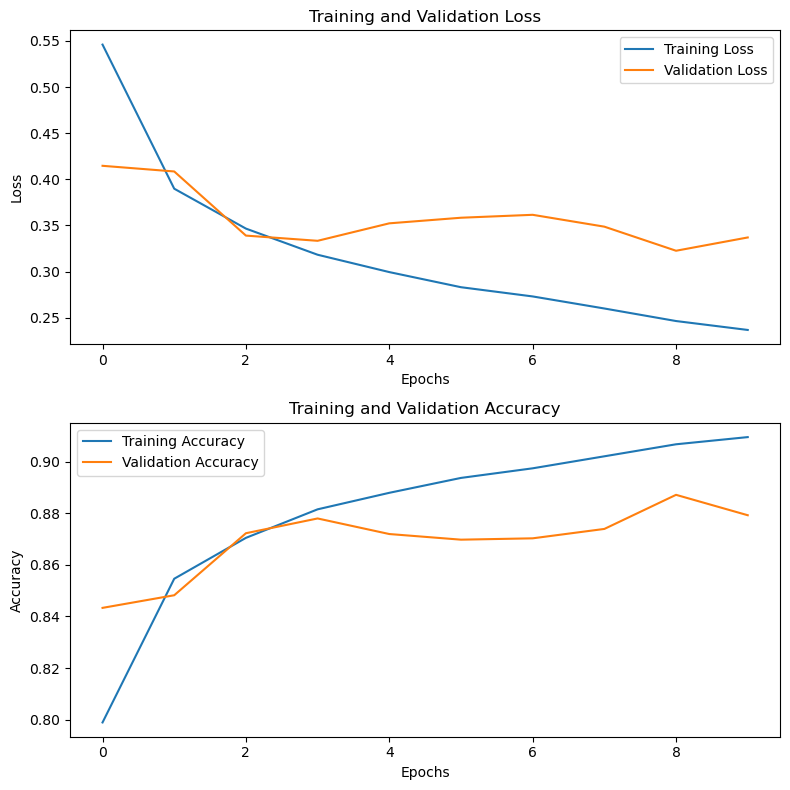

In [112]:
#https://www.tensorflow.org/tutorials/images/classification
# Get the training and validation loss from the history 
train_loss = m1.history['loss']
val_loss = m1.history['val_loss']

# Get the training and validation accuracy from the history object
train_acc = m1.history['accuracy']
val_acc = m1.history['val_accuracy']

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the training and validation loss
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training and validation accuracy
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [113]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [114]:
e3.evaluate(x_test,y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.3438 - accuracy: 0.8778


[0.34379085898399353, 0.8778333067893982]

375/375 [==============================] - 1s 1ms/step
[1.3903383e-07 7.1935763e-11 4.7578799e-09 4.3040732e-12 5.1124598e-09
 1.0251555e-09 1.2401076e-08 3.0431237e-11 9.9999988e-01 1.0469915e-12] => 8


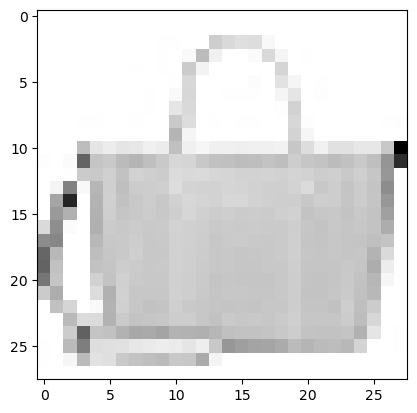

[1.3183407e-04 1.3324224e-08 4.3810496e-06 1.1663632e-08 8.8999110e-07
 1.9245132e-07 3.9937087e-05 2.4824593e-09 9.9982280e-01 6.6748789e-09] => 8


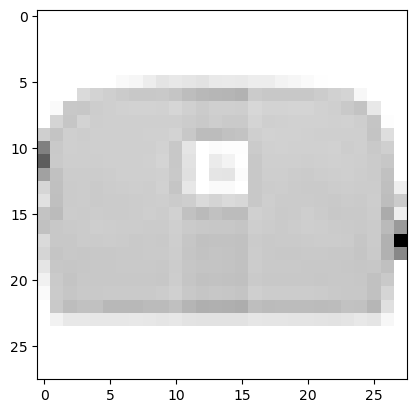

[5.8688304e-10 1.0513712e-09 3.7865627e-11 4.7850762e-07 6.8507394e-10
 4.2030076e-04 5.4492791e-08 9.9939692e-01 5.3573399e-07 1.8176925e-04] => 7


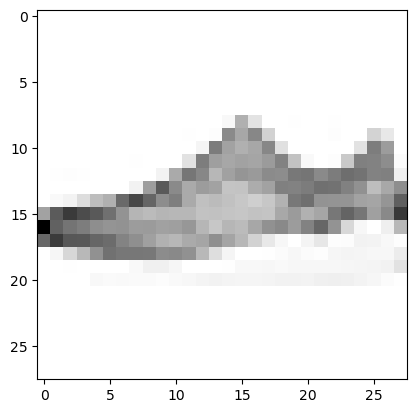

[1.9287626e-04 1.2072357e-05 5.4587748e-02 6.8257109e-04 9.1957742e-01
 3.5525613e-06 2.4822429e-02 2.4777967e-06 1.1873009e-04 9.0375259e-08] => 4


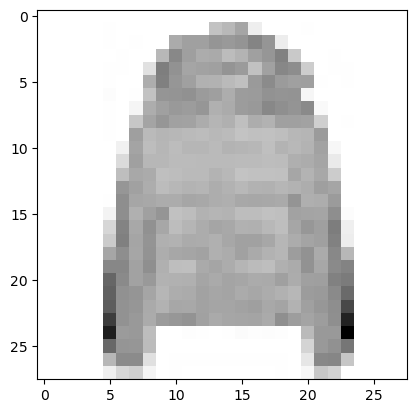

[4.5870834e-08 8.6206131e-10 3.2306544e-09 7.4210332e-11 6.6160264e-09
 3.0652193e-11 5.6038858e-09 1.7136077e-11 9.9999988e-01 5.6497439e-13] => 8


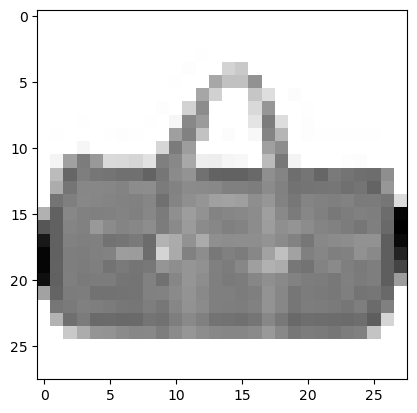

In [116]:
predictions=e3.predict([x_test])
preds = np.argmax(predictions, axis=1)
for i in range(5):
    print(predictions[i], "=>", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [126]:
start = time.time()

tfnn= e3.predict(test_images)

end = time.time()
final_time = end-start
print('\n')
print('Testing time:{}'.format(final_time))

313/313 [==============================] - 0s 1ms/step


Testing time:0.5467798709869385


In [138]:

test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
test_loss, test_acc = e3.evaluate(test_images,  test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 238.7772 - accuracy: 0.8284


In [225]:
# OBTAIN
train_labels = idx2numpy.convert_from_file(labels_file)
test_labels = idx2numpy.convert_from_file(l2_file)
train_images = idx2numpy.convert_from_file(images_file)
test_images = idx2numpy.convert_from_file(i2_file)
X_train, y_train = train_images, train_labels
X_test, y_test = test_images, test_labels

In [226]:
# SCRUB
# FLATTEN 28 x 28 IMAGE TO 784 VECTOR
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [227]:
# SCRUB
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train = X_train / 255
X_test = X_test / 255

In [228]:
# SHUFFLE TRAINING SEQUENCE
# USING RANDOM SEQUENCE FROM NUMPY

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [229]:
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [230]:
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


In [231]:
# FIRST PASS WITH MLP

import numpy as np
from scipy.special import expit
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
      Number of output units, should be equal to the
      number of unique class labels.

    n_features : int
      Number of features (dimensions) in the target dataset.
      Should be equal to the number of columns in the X array.

    n_hidden : int (default: 30)
      Number of hidden units.

    l1 : float (default: 0.0)
      Lambda value for L1-regularization.
      No regularization if l1=0.0 (default)

    l2 : float (default: 0.0)
      Lambda value for L2-regularization.
      No regularization if l2=0.0 (default)

    epochs : int (default: 500)
      Number of passes over the training set.

    eta : float (default: 0.001)
      Learning rate.

    alpha : float (default: 0.0)
      Momentum constant. Factor multiplied with the
      gradient of the previous epoch t-1 to improve
      learning speed
      w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    
    decrease_const : float (default: 0.0)
      Decrease constant. Shrinks the learning rate
      after each epoch via eta / (1 + epoch*decrease_const)

    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent circles.

    minibatches : int (default: 1)
      Divides training data into k minibatches for efficiency.
      Normal gradient descent learning if k=1 (default).

    random_state : int (default: None)
      Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """  
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, 
                 alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    
    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step"""
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function"""
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation."""
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    # FUNCTION FOR FITTING MLP 
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data"""
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):
            
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [235]:
# Declare a neural net. 
# These are the different inputs for the classifier defined above. 
# Can take 10, 15, 20, 45 minutes to run 1000

nn = NeuralNetMLP(n_output=10, #number of classes in the data set being examined (ex. for mnist 10 classes because 0,1,2,3,4,5,6,7,8,9). Note: this only works for fully labeled data sets.
                  n_features=X_train.shape[1], 
                  n_hidden=80, #try 30, 50, 80, generally more hidden layers is more accurate
                  l2=0.1, #Regularization cost, adjusting your weights 
                  l1=0.0, #Regularization cost, adjusting your weights 
                  epochs=100, #iterations (backward and forwarded passes)
                  eta=0.001, #learning rate, how fast and slow you go up and down your optimization curve
                  alpha=0.001, #multiplying to improve the speed (weights are multiplied by this alpha). Improving speed of how well your model learns
                  decrease_const=0.00001,#if you made your learning rate too high, it will shrink your learning rate so it doesn't bounce around too much
                  minibatches=50, #chunk up my training data into groups of 50 (speeds up the performance since there are so many)
                  shuffle=True, #for each epoch, it shuffles
                  random_state=1) #set value for making the shuffle

In [238]:
#Time the results of the nn - results in seconds

start = time.time()

nn.fit(X_train, y_train, print_progress=True)

end = time.time()
final_time = end-start

print(final_time)

Epoch: 100/100

74.232421875


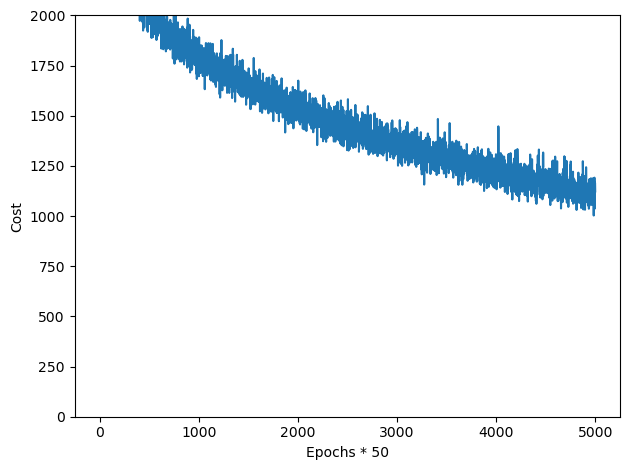

In [239]:
# ROUGH PLOT FOR EACH OF THE 50 BATCH RUNS

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [240]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

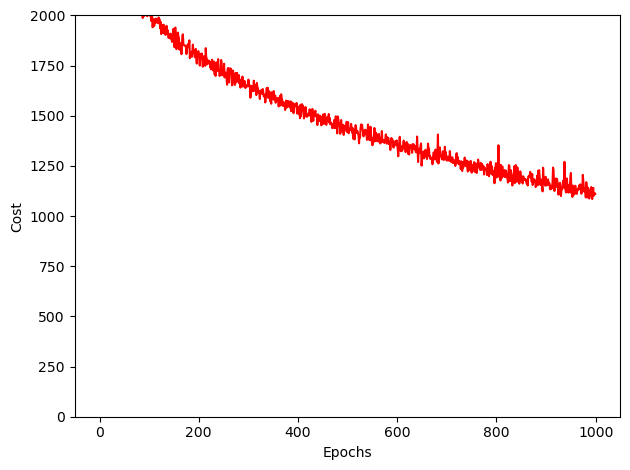

In [241]:
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig('./figures/cost2.png', dpi=300)
plt.show()

In [242]:
#see how we did on accuracy for training and test set.
#want these to be higher than 97 and 96.
import sys

y_train_pred = nn.predict(X_train)

if sys.version_info < (3, 0):
    acc = (np.sum(y_train == y_train_pred, axis=0)).astype('float') / X_train.shape[0]
else:
    acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 89.79%


In [243]:
y_test_pred = nn.predict(X_test)

if sys.version_info < (3, 0):
    acc = (np.sum(y_test == y_test_pred, axis=0)).astype('float') / X_test.shape[0]
else:
    acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 87.14%


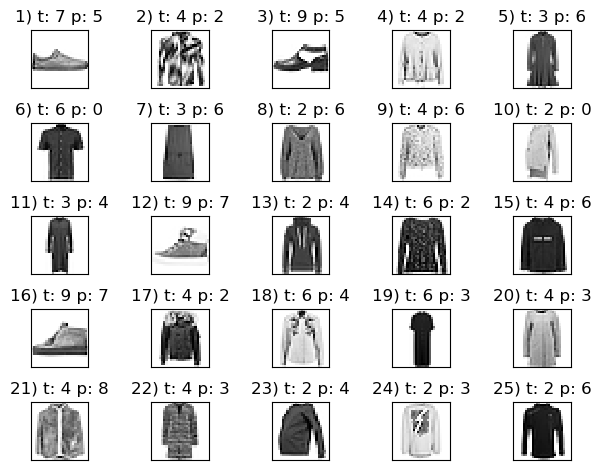

In [244]:
#look at places we might have missed

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

In [246]:
Model = ['Gaussian Naive Bayes', 'Categorical Naive Bayes', 'Random Forest', 'K-Nearest Neighbors', 
             'Linear Support Vector Machine', 'Neural Networks with Tensorflow', 'Multilayer Perceptron'] 

training = [0.4681,6.2240, 97.1500 ,100.5552, 267.5897,34.6613,74.2324 ]


score = np.array([0.5878, 0.7886,0.9999, 0.9199, 0.7984,0.8778, 0.8979 ])*100

testing = [0.5954,0.9413,0.4880, 14.2021,0.0367 , 0.5468,0]
score1 = np.array([0.5856,0.8998, 0.8767, 0.8541,0.7710, 0.8284,0.8714])*100

In [247]:
performance_df1 = pd.DataFrame({'Model':Model, 'Training':training, 'Testing':testing, 'Train_Score':score, 'Test_Score':score1})
performance_df1.sort_values(by=['Test_Score'], axis=0, ascending=False, inplace=True)
performance_df1['Rank']=(1,2,3,4,5,6,7)

In [ ]:
# add total cost feature
performance_df1['Total cost'] = performance_df1['Training'] + performance_df1['Testing']
performance_df1

In [252]:
# add total cost feature
performance_df1['Total cost'] = performance_df1['Training'] + performance_df1['Testing']
performance_df1

,Model,Training,Testing,Train_Score,Test_Score,Rank,Total cost
1,Categorical Naive Bayes,6.2240,0.9413,78.86,89.98,1,7.1653
2,Random Forest,97.1500,0.4880,99.99,87.67,2,97.6380
6,Multilayer Perceptron,74.2324,0.0000,89.79,87.14,3,74.2324
3,K-Nearest Neighbors,100.5552,14.2021,91.99,85.41,4,114.7573
5,Neural Networks with Tensorflow,34.6613,0.5468,87.78,82.84,5,35.2081
4,Linear Support Vector Machine,267.5897,0.0367,79.84,77.10,6,267.6264
0,Gaussian Naive Bayes,0.4681,0.5954,58.78,58.56,7,1.0635


In [261]:
performance_df1 = pd.DataFrame({'Model':Model, 'Training':training, 'Testing':testing, 'Train_Score':score, 'Test_Score':score1})
performance_df1.sort_values(by=['Train_Score'], axis=0, ascending=False, inplace=True)
performance_df1['Rank']=(1,2,3,4,5,6,7)
# add total cost feature
performance_df1['Total cost'] = performance_df1['Training'] + performance_df1['Testing']
performance_df1

,Model,Training,Testing,Train_Score,Test_Score,Rank,Total cost
2,Random Forest,97.1500,0.4880,99.99,87.67,1,97.6380
3,K-Nearest Neighbors,100.5552,14.2021,91.99,85.41,2,114.7573
6,Multilayer Perceptron,74.2324,0.0000,89.79,87.14,3,74.2324
5,Neural Networks with Tensorflow,34.6613,0.5468,87.78,82.84,4,35.2081
4,Linear Support Vector Machine,267.5897,0.0367,79.84,77.10,5,267.6264
1,Categorical Naive Bayes,6.2240,0.9413,78.86,89.98,6,7.1653
0,Gaussian Naive Bayes,0.4681,0.5954,58.78,58.56,7,1.0635


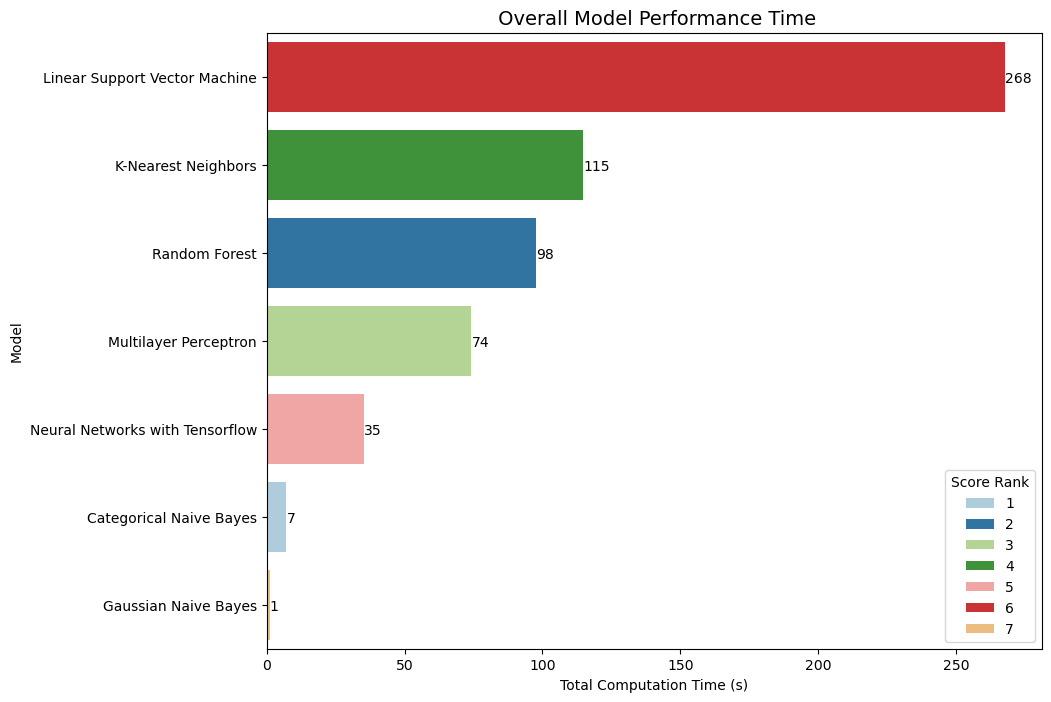

In [254]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.barplot(y='Model', x='Total cost', data=performance_df1, hue='Rank', palette=sns.color_palette("Paired"), dodge=False,
               order = performance_df1.sort_values(by=['Total cost'], axis=0, ascending=False)['Model'].values)

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title(' Overall Model Performance Time', fontsize=14);
ax.legend(loc='lower right', title="Score Rank", fancybox=True)
ax.set_xlabel('Total Computation Time (s)')

# annotate the time of each column
for p in ax.patches:
    time = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(time, (x, y), ha='left', va='center_baseline')

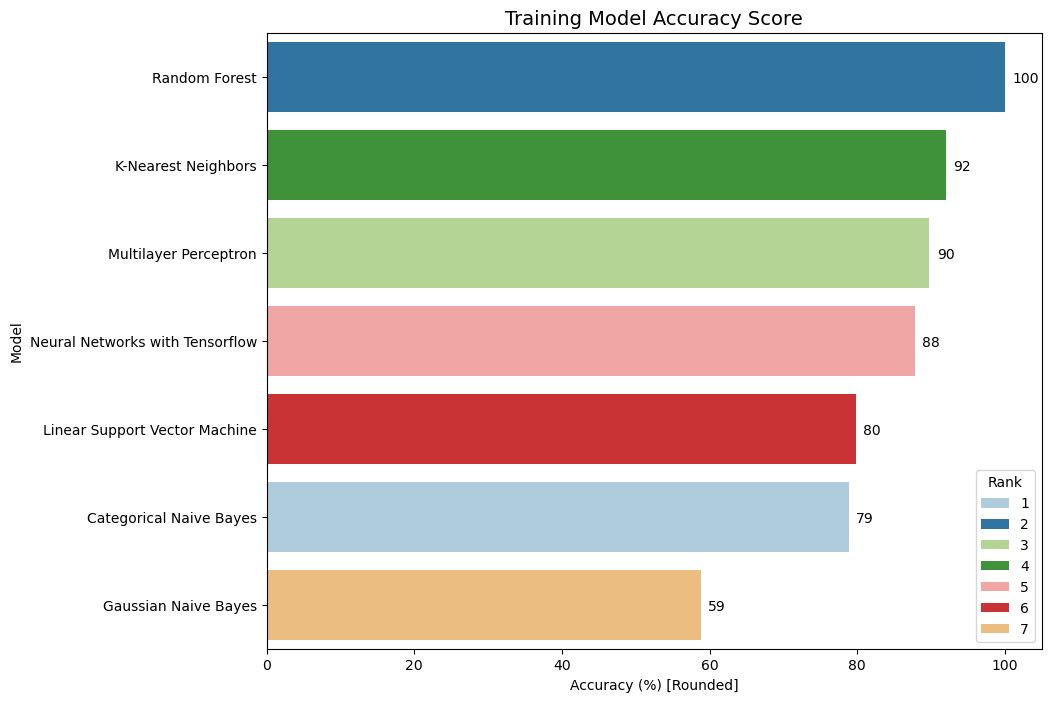

In [255]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.barplot(y='Model', x='Train_Score', data=performance_df1, hue='Rank', palette=sns.color_palette("Paired"), dodge=False,
               order = performance_df1.sort_values(by=['Train_Score'], axis=0, ascending=False)['Model'].values)

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Training Model Accuracy Score', fontsize=14);
#ax.legend(loc='lower left', title="Score Rank", fancybox=True)
ax.set_xlabel('Accuracy (%) [Rounded]')

# annotate the time of each column
for p in ax.patches:
    time = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(time, (x+1, y), ha='left', va='center_baseline')

In [256]:
performance_df1.sort_values(by='Total cost', ascending=False).reset_index(drop=True)[['Model','Training', 'Testing','Total cost']]

,Model,Training,Testing,Total cost
0,Linear Support Vector Machine,267.5897,0.0367,267.6264
1,K-Nearest Neighbors,100.5552,14.2021,114.7573
2,Random Forest,97.1500,0.4880,97.6380
3,Multilayer Perceptron,74.2324,0.0000,74.2324
4,Neural Networks with Tensorflow,34.6613,0.5468,35.2081
5,Categorical Naive Bayes,6.2240,0.9413,7.1653
6,Gaussian Naive Bayes,0.4681,0.5954,1.0635


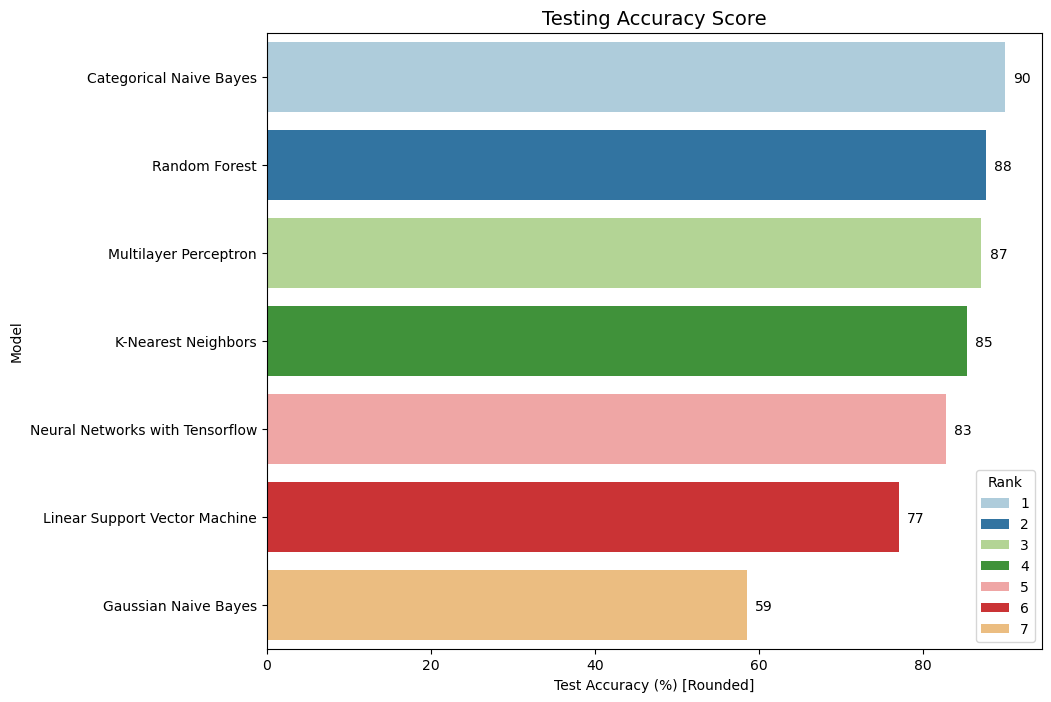

In [257]:
# Control plt figure size
plt.figure(figsize=(10,8))

# Plot the countplot
ax=sns.barplot(y='Model', x='Test_Score', data=performance_df1, hue='Rank', palette=sns.color_palette("Paired"), dodge=False,
               order = performance_df1.sort_values(by=['Test_Score'], axis=0, ascending=False)['Model'].values)

# set title of the plot, x-axis label, xticklabels, and legend
ax.set_title('Testing Accuracy Score', fontsize=14);
#ax.legend(loc='lower left', title="Score Rank", fancybox=True)
ax.set_xlabel('Test Accuracy (%) [Rounded]')

# annotate the time of each column
for p in ax.patches:
    time = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(time, (x+1, y), ha='left', va='center_baseline')